# Hackathon : Reinforcement Learning for Drone Navigation

- Team name:
- Team members names:

## 0. Prerequisites

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext autoreload
%autoreload 2

import torch
from rqmix import QMIXAgent
import simulate

## 1. Training

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"{device=}")

agent = QMIXAgent(
    num_agents=4,
    device=device,
    hidden_size=128,
    num_rnn_layers=1,
    qmix_embedding_size=128,
    qmix_hypernet_size=128,
    buffer_size=1000,
    batch_sequence_length=15,
    batch_size=64,
    lr=1e-4,
    gamma=0.99,
    epsilon=1.0,
    epsilon_end=0.01,
    epsilon_decay=0.9995,
    target_update_freq=1,
    tau=5e-3,
    gradient_clipping_value=10.0,
)

device=device(type='cuda')
Using QMIX agent with mixer network
DRQNNetwork(
  (feature_layer): Sequential(
    (0): Linear(in_features=42, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
  )
  (gru): GRU(128, 128, batch_first=True)
  (output_layer): Linear(in_features=128, out_features=7, bias=True)
)
MixingNetwork(
  (hyper_w1): Sequential(
    (0): Linear(in_features=949, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=512, bias=True)
  )
  (hyper_w2): Sequential(
    (0): Linear(in_features=949, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=128, bias=True)
  )
  (hyper_b1): Linear(in_features=949, out_features=128, bias=True)
  (hyper_b2): Sequential(
    (0): Linear(in_features=949, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)


In [4]:
trained_agent, all_rewards = simulate.train('train_config/config_wall_0.json', agent)


Episode 1, Step 100, Rolling reward: -4.97, Reward: -4.97, Evacuated: 0, Deactivated: 0
Episode 2, Step 100, Rolling reward: -4.72, Reward: -4.46, Evacuated: 0, Deactivated: 0
Episode 3, Step 100, Rolling reward: -4.70, Reward: -4.66, Evacuated: 0, Deactivated: 0
Episode 4, Step 100, Rolling reward: -1.84, Reward: 6.75, Evacuated: 1, Deactivated: 0
Episode 5, Step 100, Rolling reward: -2.08, Reward: -3.07, Evacuated: 0, Deactivated: 0
Episode 6, Step 100, Rolling reward: -2.67, Reward: -5.62, Evacuated: 0, Deactivated: 0
Episode 7, Step 100, Rolling reward: -2.74, Reward: -3.14, Evacuated: 0, Deactivated: 0
Episode 8, Step 100, Rolling reward: -2.71, Reward: -2.48, Evacuated: 0, Deactivated: 0
Episode 9, Step 100, Rolling reward: -3.07, Reward: -5.97, Evacuated: 0, Deactivated: 0
Episode 10, Step 100, Rolling reward: -2.02, Reward: 7.39, Evacuated: 1, Deactivated: 0
Episode 11, Step 100, Rolling reward: -0.79, Reward: 7.31, Evacuated: 1, Deactivated: 0
Episode 12, Step 100, Rolling re

In [6]:
trained_agent, all_rewards = simulate.train('train_config/config_wall_1.json', trained_agent)


Episode 1, Step 100, Rolling reward: -1682.40, Reward: -1682.40, Evacuated: 0, Deactivated: 2
Episode 2, Step 100, Rolling reward: -1856.76, Reward: -2031.12, Evacuated: 0, Deactivated: 3
Episode 3, Step 100, Rolling reward: -1788.36, Reward: -1651.55, Evacuated: 0, Deactivated: 2
Episode 4, Step 100, Rolling reward: -2031.42, Reward: -2760.62, Evacuated: 0, Deactivated: 3
Episode 5, Step 100, Rolling reward: -1689.86, Reward: -323.60, Evacuated: 0, Deactivated: 1
Episode 6, Step 100, Rolling reward: -1760.08, Reward: -2111.21, Evacuated: 0, Deactivated: 3
Episode 7, Step 11, Rolling reward: -1541.51, Reward: -230.08, Evacuated: 0, Deactivated: 4
Episode 8, Step 100, Rolling reward: -1571.35, Reward: -1780.18, Evacuated: 1, Deactivated: 2
Episode 9, Step 90, Rolling reward: -1437.15, Reward: -363.57, Evacuated: 1, Deactivated: 3
Episode 10, Step 100, Rolling reward: -1582.51, Reward: -2890.75, Evacuated: 0, Deactivated: 3
Episode 11, Step 100, Rolling reward: -1594.41, Reward: -1801.4

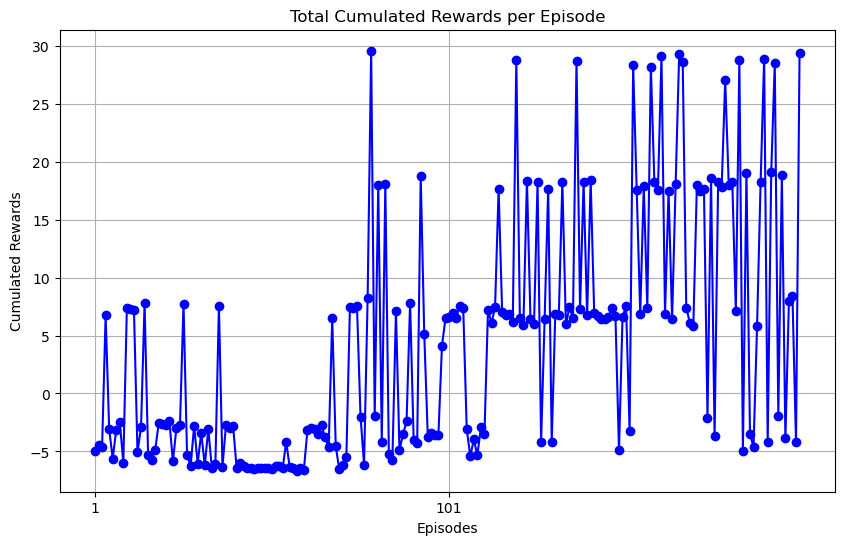

In [5]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [ ]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [ ]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)

In [ ]:
display(all_results)

In [ ]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)